<h1><center> Programming in Python </center></h1>

<h1><center> <span style='color:red'>Lab 3: Working with Numpy </span></center></h1>

As for the previous lab: try to understand the code and anticipate the output before you run the cell. Did it confirm your guess? Great! If not, try to understand why, and, if needed, ask questions to your colleagues, or during the lab session.

Reminder for Jupyter notebook: Check [here](https://www.markdownguide.org/basic-syntax/) for more details on the Markdown syntax. You can change the cell type by selecting Cell > Cell Type.



This first part of this course is based on the book [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/), by Jake VanderPlas, which is available for free in its online version.

<h2><center> <span style='color:red'>Last week's exercises </span></center></h2>

In [ ]:
# factorial using Python loop:

def factFn(n):
    fact=1
    for i in range(1,n+1):
        fact*=i
    return fact

In [ ]:
factFn(15)

In [ ]:
n=20
print("\n 20!=", factFn(n))
print(" 20!=", np.prod(np.arange(1,n+1, dtype='int64')))
print("2^63=", 2**63)

n=21
print("\n 21!=", factFn(n))
print(" 21!=", np.prod(np.arange(1,n+1)))
print("2^63=", 2**63)

In [ ]:
import numpy as np

n=12
print("\n 12!=", factFn(n))
print(" 12!=", np.prod(np.arange(1,n+1, dtype='int32')))
print("2^31=", 2**31)

n=13
print("\n 13!=", factFn(n))
print(" 13!=", np.prod(np.arange(1,n+1, dtype='int32'),dtype='int32'))
print("2^31=", 2**31)

In [ ]:
n=20
print("\n 20!=", factFn(n))
print(" 20!=", np.prod(np.arange(1,n+1, dtype='int64')))
print("2^63=", 2**63)

n=21
print("\n 21!=", factFn(n))
print(" 21!=", np.prod(np.arange(1,n+1, dtype='int64'),dtype='int64'))
print("2^63=", 2**63)


<h2><center> <span style='color:red'>0 - Useful tools </span></center></h2>
<h2><span style='color:red'>0.1. Scientific notation and rounding number </span></center></h2>

<h3>Rounding with <code>round()</code>:</h3>
As we saw in the first lecture, you can use the function <code>round()</code> to round a float number to a certain number of digits. However, this doesn't allow you round the number to fixed number of significant digits (as you would get with a scientific notation). See example below:

In [1]:
x = 0.0079873129957356789
round(x, 2)

0.01

<h3>Scientific notation and rounding with <code>format()</code>:</h3>
To print a float number in scientific notation and round it to a chosen number of significant digits, you can use the function <code>format()</code>. See example below:

In [ ]:
x = 0.0079873129957356789
print(format(x,'.2E'))
print(format(x,'.3E'))

Note that the function <code>format()</code> returns a string. If needed, this latter can be re-converted to a float number using the function <code>float()</code>:

In [ ]:
type(format(x,'.2E'))

In [ ]:
y=float(format(x,'.2E'))
print(y)

<h2><span style='color:red'>0.2. Scipy Constants Library </span></center></h2>

As SciPy is more focused on scientific implementations, it provides many built-in scientific constants, which can be found in the <code>constants</code> library: see [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/constants.html) and this [online course](https://www.w3schools.com/python/scipy/scipy_constants.php).

In [36]:
from scipy import constants

In [40]:
# Example of mathematical constant: the golden ratio:
constants.golden_ratio

1.618033988749895

In [41]:
# Speed of light in vacuum in meters:
constants.speed_of_light

299792458.0

In [42]:
# hbar in SI units:
constants.hbar

1.0545718176461565e-34

<h2><span style='color:red'>0.3. Displaying table using <code>pandas.DataFrame()</code> </span></center></h2>

This is just a recall from lab2.

To display data in a nice table format in Python, you can use the function <code>Pandas.DataFrame()</code> of the module Pandas. 

You can install Panda by running <code>pip install panda</code> in your terminal (or <code>python3 -m pip install panda</code> in case you have several versions of Python installed on your laptop).

Then use the <code>Pandas.DataFrame()</code> function to print data in table format as in the following example:

In [ ]:
import pandas as pd

d = [ ["Mark", 12, 95],
     ["Jay", 11, 88],
     ["Jack", 14, 90]]

df = pd.DataFrame(d, columns = ['Name','Age','Percent'])
print(df)

<h2><center> <span style='color:red'> I - NumPy arrays </span></center></h2>

We have seen previously that a list in Python can store variables referring to any type of object. This brings flexibility but introduces some computational inefficiency. Each item in the list needs to be a complete object and operations within a list always need to check the type of objects they are applied to. 

**NumPy:** provides an efficient way to store and manipulate multi-dimensional arrays. This is achieved as <span style='color:red'>**numpy arrays in python are fixed-type**</span>: only numerical values, from the same type, can be stored in one NumPy array (*ndarray*). <span style='color:red'>We lose flexibility but gain efficiency in storing and manipulating data</span>. A lot of projects in data science involve manipulating numerical values, so it is convinient to master a library intirely dedicated to such data type. Some further advantages of NumPy are:

* It provides an *ndarray* structure, which allows efficient storage and manipulation of vectors, matrices, and higher-dimensional datasets.
* It provides a readable and efficient syntax for operating on this data, from simple element-wise arithmetic to more complicated linear algebraic operations.

To use the functionality provided by the NumPy library we need first to import it. The line <code>import numpy as np</code> allows to import NumPy and to create a shorter alias for its namespace. 
By convention NumPy is imported under the alias <code>np</code>. 
We can then use the NumPy types and methods using the prefix <code>np.</code>


In [2]:
import numpy as np

<h2><span style='color:red'>I.1. Creating a NumPy Array </span></center></h2>

<h3>a. One-dimensional arrays</h3>

Numpy arrays look a lot like python lists; the important difference being the fixed-type. Check the following examples:

In [ ]:
# You can create a NumPy array from a Python list of numbers:
list_of_numbers = [10,11,12,13,14,15,16,17,18]

x = np.array(list_of_numbers)
x

In [ ]:
# numpy has a 'arange()' function that works very similarly to 'range()' in python:

x=np.arange(1, 10)
x

**<span style='color:red'>Q1.</span> Can you make a numpy array that contains the even numbers between 10 and 20 included, without using a python loop?**

In [ ]:
# Solution to Q1:

<h3>b. Multi-dimensional arrays:</h3>

Unlike Python lists (which are limited to one dimension), NumPy arrays can be multi-dimensional. 

Multi-dimensional arrays can be defined from nested lists (ex. a list of lists of numbers), or obtained from reshaping a 1-dimensional array. Check the following examples:

In [ ]:
# Create a NumPy array from a Python list of list of numbers.
# !! Important: each internal list must have the same size !!

list_of_list_of_3numbers = [[1,2,3],[3,4,6]]
x2=np.array(list_of_list_of_3numbers)
x2

In [ ]:
# Reshape a 1-dimensional array of 9 elements into a 3x3 array:

y=np.arange(1, 10)
y.reshape((3, 3))

**<span style='color:red'>Q2.</span> Can you create the following numpy array with a one-line code using nested lists?<br> Can you try it using exactly 1 or 2 calls of <code>range()</code> with list comprehensions?** <br>

  <code>array([[ 0,  1,  2,  3],
        [10, 11, 12, 13],
        [20, 21, 22, 23],
        [30, 31, 32, 33],
        [40, 41, 42, 43]])</code>  

In [ ]:
# Solution to Q2:
# using nested lists to obtain a multi-dimensional array:

In [ ]:
# This also works:

In [ ]:
# This also works:

<h2><span style='color:red'>I.2. Arrays: Methods and Attributes:</span></h2>

<h3>a. Array attributes:</h3>

Each array has attributes <code>ndim</code> (the number of dimensions), <code>shape</code> (the size of each dimension), and <code>size</code> (the total size of the array). Another useful attribute is  <code>dtype</code>, which is the data type of the array. For ex:

In [ ]:
x=np.array([[1,2,3],[3,4,6]])
print(x, '\n')

print("ndim: ", x.ndim)
print("shape:", x.shape)
print("size: ", x.size)
print("dtype: ", x.dtype)

**<span style='color:red'>Ex1.</span>** Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. If types do not match, NumPy will upcast if possible. <br> For example:

In [ ]:
# Array of integers:
x1=np.array([1,3,7])
x1.dtype

In [ ]:
# Here, integers are up-cast to floating point:
x2=np.array([3.13, 4, 2, 3])
x2.dtype

In [ ]:
# Here, np.array up-cast everything to complex type:
x3=np.array([3.13, 4, 2j, 3])
x3.dtype

It is possible to explicitly set the data type of an array with the keyword <code>dtype</code>. For example:

In [ ]:
np.array([1, 2, 3, 4], dtype='float32')

**<span style='color:blue'>Q3.</span> What information is returned by each of the following calls?**

In [ ]:
y=np.array([[1,2],[3,4],[3,6]])
print(y.ndim)
print(y.shape)
print(y.size)
print(len(y))

<h3>b. Useful methods:</h3>

**<span style='color:red'>Q4.</span> Check the following examples: what are the output?**

In [ ]:
np.zeros((3,3))

In [ ]:
np.ones((3,5), dtype=int)

In [ ]:
np.full((3,5),3)

In [ ]:
np.linspace(0,1.5,5)

In [ ]:
np.eye(3)

<h2><span style='color:red'>I.3. Indexing and Slicing:</span></h2>

<h3>a. Indexing</h3>

Indexing in NumPy is very similar to Python's standard list indexing.

In a one-dimensional array, the i-th value (counting from zero) can be accessed by specifying the index in square brackets, just as with Python lists. 

In a multi-dimensional array, items can be accessed using indices separated with a coma.

In [ ]:
x1=np.arange(10)
print(x1)

# Use square brakets to access the i-th element:
x1[3]

In [ ]:
# To index from the end of the array, you can use negative indices:
x1[-1]

In [ ]:
x2 = np.array([[1,2,3],[3,4,6]])
print(x2, '\n')

# For multi-dimensional array, indices are separated by comas:
print(x2[0, 0])  # 2d-array works like for matrices

print(x2[1, -1]) # You can also use negative indices here

**Modifying values in an array:** Values can also be modified using any of the above index notation.
Keep in mind that, unlike Python lists, NumPy arrays have a fixed type. This means, for example, that if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. Don't be caught unaware by this behavior!

See the following examples:

In [ ]:
# Values can also be modified using any of the above index notation:
x2[0, 0] = 12
print(x2, '\n')

# Reminder: numpy array have fixed type, 
# x2 is of type integer here:

x2[0, 0] = 10.34518  # this will be truncated to the integer part!!!
print(x2)

<h3>b. Slicing</h3>

The NumPy slicing syntax follows that of the standard Python list; to access a slice of an array <code>x</code>, use <code>x[start:stop:step]</code>. If any of these are unspecified, the default values are: <code>start=0</code>, <code>stop=size of dimension</code>, <code>step=1</code>. 

**One-dimensional arrays:** One-dimensional slices work exactly as for list:

In [ ]:
# For 1-dimensional array, it works exactly as for list:
x1=np.arange(10)
print(x1)

# sub-list of elements from indice 1 to 8 (included:
print(x1[1:9])

# all elements, reversed
print(x1[::-1])  

**Multi-dimensional arrays:** Multi-dimensional slices work in the same way, with multiple slices separated by commas: 



In [ ]:
# Example for a 2d-array:
x2=np.array([[12,  5,  2,  4], [ 7,  6,  8,  8], [ 1,  6,  7,  7]])
x2

In [ ]:
# keeps only from the previous matrix:
#     - the 2 first rows (2 first elements in the first dimension)
#     - and the 3 first columns (3 first elements in the second dimension)

x2[:2, :3]  # two rows, three columns

**<span style='color:red'>Q5.</span> Can you perform the slicing of the 2d-array <code>x2</code> described in the following comments?**

In [ ]:
# print all rows of x2, but every other column:

In [ ]:
# reversed together the order of the elements in each dimension:

<h3>c. Access a single row or a single column, by combining Indexing and Slicing</h3>

One commonly needed routine is accessing of single rows or columns of an array. This can be done by combining indexing and slicing, using an empty slice marked by a single colon:

In [ ]:
# first column of x2:
print(x2[:, 0])

In [ ]:
# first row of x2:
print(x2[0, :]) 
print(x2[0])   # equivalent more compact notation, only for row access

<h2><span style='color:red'>I.4. Copy of an array:</span></h2>

<h3>a. Important: elements of an arrays are mutable objects</h3>

**<span style='color:red'>Q6.</span> Comment on what happens in the two following examples:**

In [ ]:
import numpy as np
a0=np.ones((3,3), dtype=float)
a1=a0
a1[1][1]=8
print(a0)

In [ ]:
a0=np.ones((3,3), dtype=float)
a1=np.copy(a0)
a1[1][1]=8
print(a0)

<h3>b. Important: sub-array are not a copy of the array!</h3>

One important thing about array slices is that they return views and not copies of the array data. Which means that if you modify a sub-array, you are actually modifying the original array itself!

This is one area in which NumPy array slicing differs from Python list slicing: in lists, slices will be copies. 

This default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer.

**<span style='color:red'>Ex2.</span>** For example:

In [ ]:
x2=np.array([[12,  5,  2,  4], [ 7,  6,  8,  8], [ 1,  6,  7,  7]])
print(x2)

In [ ]:
# Let's extract a 2×2 subarray from this:
x2_sub = x2[:2, :2]
print(x2_sub)

In [ ]:
# Now if we modify this subarray:
x2_sub[0, 0] = 99
print(x2_sub)

In [ ]:
# the original array is changed! 
print(x2)

<h3>b. Creating copies of arrays</h3>

It is sometimes useful to explicitly copy the data within an array or a subarray. This can be done with the <code>copy()</code> method:

**<span style='color:red'>Q7.</span> Can you make a copy of the top-left 2x2-sub-array of <code>x2</code> (identical to the sub-array sliced above) using <code>.copy()</code>, then modify the sub-array and check that the original array is left unchanged?**

In [ ]:
# Let's copy a 2×2 subarray from x2:

In [ ]:
# modification of the sub-array:

In [ ]:
# check that the original array is unchanged:

**<span style='color:blue'>Ex 3.</span>** It is also possible to copy element by element an array into another array, or a sub-part of an array into another array. Check the following examples:

In [ ]:
a=0.5*np.ones(shape=(2,2))
b=0.3*np.ones(shape=(2,2))
print("a =", a, '\n\nb =', b)

## Ex1: Copy all the elements of a in b:
b[:,:]=a[:,:]
print('\n\nb =', b, ' --> \'b\' is a copy of \'a\'')
b[0,0]=1
print('\n\na =', a, '--> \'a\' is unchanged \n\nb =', b)  ### a remains unchanged

In [ ]:
a=0.5*np.ones(shape=(2,2))
b=0.3*np.ones(shape=(2,2))
print("a =", a, '\n\nb =', b)

## Ex2: Copy the 2nd columns of a in b:
b[:,1]=a[:,1]
print('\n\nb =', b, ' --> 2nd column of \'b\' is a copy of \'a\'')
b[0,1]=1
print('\n\na =', a, '\n\nb =', b)

<h2><center> <span style='color:red'> II - Operations on NumPy arrays </span> </center></h2>

<h2><span style='color:red'>II.1. Slowness of loops</span></h2>

The reasons why NumPy is so important in the Python data science world, is that it provides an easy and flexible interface to optimized computation with arrays of data.

<h3>a. Loops are typically very slow in Python:</h3>

Python's default implementation (known as CPython) does some operations very slowly. This is in part due to the dynamic and interpreted nature of the language (the fact that types are flexible). Each time python performs an operation on objects, it first has to check the type of the objects. This can become very constraining when many small operations are being repeated, for instance looping over arrays to operate on each element.

**<span style='color:red'>Ex 3.</span> Run the following example: how long does it takes to go through the loop?**

In [ ]:
import numpy as np

# Example of a function that is applied to all the elements of a vector:
def reciprocal(x):
    x_reciprocal = np.empty(len(x))
    for i in range(len(x)):
        x_reciprocal[i] = 1.0 / x[i]
    return x_reciprocal

# Test:
np.random.seed(0)
x = np.random.randint(1, 10, size=5)
reciprocal(x)

In [ ]:
big_array = np.random.randint(1, 100, size=1000000)
%timeit reciprocal(big_array)

It takes several seconds to compute these $10^6$ operations and to store the result. Even cell phones have processing speeds measured in Giga-FLOPS (i.e., $10^9$ of numerical operations per second). This is very slow! 

The bottleneck here is not the operations themselves, but the type-checking and function dispatches that CPython must do at each cycle of the loop. Each time the reciprocal is computed, Python first examines the object's type and does a dynamic lookup of the correct function to use for that type. If we were working in compiled code instead, this type specification would be known before the code executes and the result could be computed much more efficiently.

For many types of operations, NumPy provides a convenient interface for this kind of statically typed, compiled routine. This is known as a vectorized operation.

<h3>b. Vectorized operations are much faster</h3> 

A vectorized operation is done by simply performing an operation directly on the array, which will then be applied to each element. This vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution.

**<span style='color:red'>Ex 4.</span> Run the following example: how long does it takes to go through the loop?**

In [ ]:
# The execution time for our big array is several orders of magnitude faster than the Python loop:
%timeit (1.0 / big_array)

<h2><span style='color:red'>II.2. NumPy's UFuncs</span></h2> 
Vectorized operations in NumPy are implemented via NumPy's universal functions (ufuncs), whose main purpose is to quickly execute repeated operations on values in NumPy arrays. 

Ufuncs are extremely flexible: you can perform operations between a scalar and an array, or also between two arrays. Operations can be done on arrays of any dimensions. For more information see ["Array broadcasting in numpy"](https://numpy.org/doc/stable/user/basics.broadcasting.html).


<h3>a. Arithmetic Ufunc</h3> 

**Array arithmetic:** NumPy's ufuncs feel very natural to use because they make use of Python's native arithmetic operators. The standard addition, subtraction, multiplication, and division can all be used.

Note that each of these arithmetic operations are simply convenient wrappers around specific functions built into NumPy; for example, the <code>+</code> operator is a wrapper for the <code>np.add()</code> function:

In [ ]:
x = np.arange(4)
print(x+5)
print(np.add(x,5))

The following table lists the arithmetic operators implemented in NumPy:

python | equivalent numpy operator | operation
---|---|---
<code>+</code> | np.add | Addition (e.g., 1 + 1 = 2)
<code>-</code> | np.subtract | Subtraction (e.g., 3 - 2 = 1)
<code>-</code> | np.negative | Unary negation (e.g., -2)
<code>*</code> | np.multiply | Multiplication (e.g., 2 * 3 = 6)
<code>/</code> | np.divide | Division (e.g., 3 / 2 = 1.5)
<code>//</code> | np.floor_divide | Floor division (e.g., 3 // 2 = 1)
<code>**</code> | np.power | Exponentiation (e.g., 2 ** 3 = 8)
<code>%</code> | np.mod | Modulus/remainder (e.g., 9 % 4 = 1)

**<span style='color:red'>Q8.</span> Can you re-write the following code (written with Python's list comprehension) with a one-line command using  operation on a python array?**

In [ ]:
print([i**2 for i in range(10)])

# Solution to Q8:

**Operations between two arrays:** Ufuncs can operate between two arrays of the same shape:

In [ ]:
# The following operation divide each element of the first array by each element of the second array
# operations are performed element by element.
np.arange(5) / np.arange(1, 6)

**<span style='color:red'>Q9.</span> This is a useful feature to perform operations on matrices. Can you define and sum the two following matrices: <code>A</code> is a 3x3 identity matrice, and <code>B</code> is a 3x3 matrice with all integer values 1 to 9 filled by line?**

In [ ]:
# Solution to Q9:

<h3>b. Boolean operators and Masks</h3>

Boolean/bitwise operators can also be used for element-wise operations on arrays:

In [ ]:
x=np.array(range(0, 100, 10))
print(x)

# Using boolean operator on arrays:
x>=50

**Masks:** You can use a list or an array of booleans to define which elements to keep or not in a given array. The list of boolean must have the same shape as the original array. Note that the returned array is copy (i.e., a new array, and not just a viewing as when you use 'slicing').

For instance:

In [ ]:
#boolean array as mask:
# You can use a list of booleans to define which elements to keep or not
x[[False, False, False, False, False,  True,  True,  True,  True,  True]]

**<span style='color:red'>Q10.</span> Using a boolean operator on an array and a mask: can you write a one-line code that extract the sub-list of <code>x</code> which contains only the elements of <code>x</code> that are larger or equal to 50?**

In [ ]:
# Answer to Q10:

<h3>c. Other useful Ufunc</h3>

Other functions such as absolute value <code>np.abs()</code>, trigonometric functions 
(<code>np.sin()</code>, <code>np.cos()</code>, <code>np.tan()</code>, <code>np.arcsin()</code>, <code>np.arccos()</code>, <code>np.arctan()</code>), exponentials and logarithms, as well as other special functions, are also implemented as Ufunc in numpy. 

Check here [*Python Data Science Handbook*](https://jakevdp.github.io/PythonDataScienceHandbook/02.03-computation-on-arrays-ufuncs.html#Array-arithmetic) for examples of usage of these functions.


**<span style='color:red'>Q11.</span> From lab2, can you re-do the 'Exo 4. Sampling' in a single line, by using numpy array and the Ufunc features of numpy instead of a loop? Test your new sampling function on <code>np.exp()</code> and another function of your choice.**

**Recall of the original exercise:** We would like to regularly sample a function <code>f(x)</code>.
Can you write a function <code>Sampling(f, xmin, xmax, n)</code> that returns a list of the values of <code>f(x)</code> for <code>n</code> values of <code>x</code> regularly spaced between <code>xmin</code> and <code>xmax</code>?

Try your code with the a function of your choice.

In [ ]:
# Answer to Q11:

In [ ]:
# Ex 1 with np.exp() between xmin=0, xmax=10 and n=20:

In [ ]:
# Ex 2 with another function: (for example, f(x)=2*x, or anything else)

**<span style='color:blue'>Q12.</span> Using a boolean operator on an array and a mask: can you write a one-line code that takes the logarithm of all the strictly positive elements of the array <code>a</code> below, and replace these values in <code>a</code>?**

<h2><center> <span style='color:red'> III - Interesting uses of NumPy Arrays </span></center></h2>
  
<h2><span style='color:red'>III. 1. Simple data statistics with numpy arrays </span></h2>

These are advanced Ufunc features.

Often when faced with a large amount of data, a first step is to compute summary statistics for the data, such as mean and standard deviation, but other aggregates are useful as well (the sum, product, median, minimum and maximum, quantiles, etc.).

NumPy has fast built-in aggregation functions for working on arrays.

For instance, numpy as a <code>np.sum()</code> that does the same thing as the build-in <code>sum()</code> function of python, i.e. it computes the sum of the elements of an array. However, because it executes the operation in compiled code, NumPy's version of the operation is computed much more quickly:

In [ ]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

Same thing happens with the <code>min()</code> and <code>max()</code> functions:

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

Whenever possible, make sure that you are using the NumPy version of these aggregates when operating on NumPy arrays!

You can find [here](https://jakevdp.github.io/PythonDataScienceHandbook/02.04-computation-on-arrays-aggregates.html) a list of useful aggregation functions available in NumPy.

**<span style='color:blue'>Q13.</span> <code>min()</code>, <code>max()</code> and <code>sum()</code> of an array are also implemented as methods of the array. Can you return these three values for <code>big_array</code> using array methods instead of numpy functions?**

In [ ]:
# Answer to Q13:


**<span style='color:blue'>Q14.</span> Can you write a one-line code that returns $n!$ using the array method <code>prod()</code>? Test your code.**
Remember that integers are encoded on 64-bits in numpy, and therefore you cannot compute $n!$ for $n>20$.

In [ ]:
# Answer to Q14:


<h2><span style='color:red'>III. 2. Linear algebra </span></h2>

A two-dimensional array is one representation of a matrix, and NumPy knows how to efficiently do typical matrix operations. For example, you can:
 - compute the transpose using <code>M.T</code>;
 - compute the dot product (for vector-vector product, matrix-vector product, or matrix-matrix product) using <code>np.dot(M1,M2)</code>;
 - compute the trace using <code>M.trace()</code>;
 - extract a vector of the diagonal elements, with <code>M.diagonal()</code>;
 - flatten the matrix using <code>M.flatten()</code>;
 - compute the cross product of two vectors, using <code>numpy.cross(V1, V2)</code>.
 
You can also do more sophisticated operations from the numpy <code>np.linalg</code> package, such as:
 - get the matrix norm (or vector norm), with <code>np.linalg.norm(M)</code>;
 - get the rank of the matrix, with <code>np.linalg.matrix_rank(M)</code>;
 - get the determinant of a square matrix, with <code>np.linalg.det(M)</code>;
 - get the inverse of non-singular square matrix (with determinant different from 0), with <code>np.linalg.inv(M)</code>;
 - eigenvalue decomposition using <code>np.linalg.eigvals(M)</code>;
 - get a tuple (eigenvalues, eigenvectors) using <code>np.linalg.eig(M)</code>;

Rem: there exists a numpy.matrix class. However, it is no longer recommended to use this class, even for linear algebra. Instead simply use regular arrays. The class may be removed in the future.


**Remarque:** to transpose a vector, it should be defined as a 2d-array (a matrix), i.e. using double square brakets:

In [ ]:
%timeit min(big_array)
%timeit np.min(big_array)

**<span style='color:red'>Q15.</span> Consider two matrices** 
$M_1=\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8
\end{pmatrix}$ **and** $M_2=\begin{pmatrix}
2 & 1 & 0\\
5 & 4 & 3\\
8 & 7 & 6
\end{pmatrix}$ **and the identity matrix** $I_3$.

**Can you check that the matrix $(I_3+M_2)$ is invertible, and compute the following operation?**

$${\rm Tr}\big(M_1^T.(I_3+M_2)^{-1}\big)$$

In [ ]:
# Answer to Q15:

<h2><span style='color:red'>III. 3. Random Arrays </span></h2>

Using the library <code>np.random</code> of numpy.

**<span style='color:red'>Q16.</span> Can you create the following matrices?**<br>
Remember to use the <code>?</code> feature to get more information on a function.


In [ ]:
import numpy.random as rand  # Create alias: non necessary

In [ ]:
# Create a 3x3 array of uniformly distributed
# random values between 0 and 1, using 'np.random.random()'

In [ ]:
# Create a 3x3 array of normally distributed random values
# with mean 0 and standard deviation 1, using 'np.random.normal()'

In [ ]:
# Create a 3x4 array of random integers in the interval [0, 10)
# using 'np.random.randint()'

<h1><center> <span style='color:red'>Homework assignment:</span><br><br>
    Programming with NumPy</center></h1>

For the homework assignment, please provide your answers to the exercise H1 to H4 below. Exercise H5 is optional. Note that exercises H1 to H3 are rather short, while exercise H4 is much longer.


The following exercises must be done **using numpy arrays**. When possible, use operations on numpy arrays instead of python loops.

<h2>H1: Stacking in NumPy </h2>

Using the functions <code>np.vstack()</code> (vertical stack of array) and <code>np.hstack()</code> (horizontal stack of array) -- or directly the function <code>np.concatenate()</code> -- can you write a code that create the following 2d-array:

$$
000000000\\
100000001\\
200090002\\
300090003\\
400090004\\
500090005\\
600090006\\
700090007\\
800090008\\
999999999\\
$$


In [ ]:
# Example: for stacking horizontally several arrays:
grid = np.array([[1, 2, 3],
                 [4, 5, 6]])

y = np.array([[99],
              [99]])
np.hstack([grid, y, grid])

In [ ]:
# Answer to Exercise H1:

<h2>H2: Norm of a vector </h2>

Sample a $n$-dimensional vector <code>x</code> with random entries uniformly sampled between 0 and 1. Can you write a one-line code that compute the norm of this vector without using the function <code>np.linalg.norm()</code>? Check your result by comparing with the out of <code>np.linalg.norm()</code>.

In [ ]:
# Answer to Exercise H2:

<h2>H3: Statistics on population heights </h2>

The following numpy array <code>data</code> contains the heights of 500 individuals in cm its second columns.

  a. Can you extract this column in a numpy array named <code>heights</code> and check that there are indeed 500 values?
  
  b. Can you find out which are the smallest and the largest heights? what is the mean value? the standard deviation?
  
  c. Using the function <code>np.histogram()</code>, can you create an array that store the histogram of the heights by steps of 1cm? Check that the sum of the elements of that array is still equal to 500.
  
  d. Using a boolean mask, can you count how many 'Female' there is in the dataset? Can you find out which are the smallest and the largest heights among the women? among the men?
  
  e. Using the pandas function <code>pd.read_csv()</code> (as in the example below), can you extract the heights of the US presidents from the csv file 'president_heights_new.csv'? Can you also print out the values of the min, max, mean and std?

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv('Lab3_500_Person_Gender_Height_Weight_Index.csv')
data=df.values
print(df)
print(data)

In [ ]:
# Answer to question 1.a:

In [ ]:
# Answer to question 1.b:

In [ ]:
# Answer to question 1.c:

In [ ]:
# Answer to question 1.d:

In [ ]:
# Answer to question 1.d: Female dataset:

In [ ]:
# Answer to question 1.d: Male dataset:

In [ ]:
# Answer to question 1.e:

<h2>H4: Laplace's equation and 3D plots </h2>

Solving Laplace's equation in a 2-dimensional system. Four conductors with fixed potentials 100 Volts and 0 Volt are placed in a rectangular cavity with a fixed potential of 0 Volt (see figure).

We want to compute the electrostatic potential $V(x, y)$ at any location within the cavity. For that, we need to solve numerically the equation (there is a unique solution):
$$\begin{cases}
\Delta V=0\\
\textrm{with the constraints that }\qquad V = \textrm{ fixed values on the condutors}
\end{cases}$$

To do so, we compute the value of $V(x,y)=V_{i,j}$ at discreate positions $(i,j)$ on a regular lattice placed within the cavity, such that $i$ goes from 0 to 60 included, and $j$ from 0 to 105 included (see figure). Distances are measured in lattice steps. In this conditions, the solution of the equation can be obtained in the following way:

 1. For all the points on a condutor (including the cavity borders), the potential has a fixed value;
 
 2. For all the points within the cavity, the potential starts with an initial value $V=0$, we then update the values of all the V_{i,j} with the following formula:
$$V_{i,j}=\displaystyle\frac{V_{i-1,j}+V_{i,j-1}+V_{i+1, j}+V_{i,j+1}}{4}$$
i.e., for each point on the lattice, the potential take the value of the mean of its four neighboors.

 3. We iterate point 2. until we reach a good convergence.
 
**Q1.a:** Write a function that compute the value of the potential for a fixed number of iterations (given as argument of the function) and returns the matrix (2D numpy array) with the obtained value of the potential.

**Q1.b:** Note that one can iterate over the entire grid using two Python loops, however we all know now that this would be much slower than performing directly operations on the NumPy arrays. 
If you haven't done it in the previous question, can you try to use NumPy operations/iterations instead of Python loops to answer the same question?
Using the magic command <code>%time</code>, can you check how much faster the program runs?

**Q2:** Can you plot the obtained potential using contour plots after the following number of iterations: $N_{it}=100$, $500$, $1000$, $2000$? Plot all the curves on the graph, by giving each curve a different color. Don't forget to label the curves.

*Hints: check the example of use of the function <code>plt.contour()</code> in the section "Part 5 - Density and Contour Plots" of the notebook on Matplotlib, or use <code>ax.contour()</code>. To print the legend, use <code>plt.legend()</code> or <code>ax.legend()</code> with the correct arguments, or use <code>ax.clabel()</code> to print the values of the levels directly on the contours.*

**Q2.b:** Can you overlay a heatmap of values of the potential with a contour plot of the potential at $N_{it}=2000$?

*Hints: To plot a heatmap from a matrix, you can use <code>imshow()</code>, in which you can specify the argument <code>cmap</code> to change the color of the heatmap. You can use the [matplotlib library](https://matplotlib.org/stable/users/explain/colors/colormaps.html) <code>cm</code> to an external site. to choose different colormaps (for example you can use predefined colormaps such as <code>cmap=cm.coolwarm</code>, which will give you a blue to red heatmap).*

**Q2.c:** Can you create a 3D-plot of the potential at $N_{it}=2000$?

*Hints: For examples, check the section "3D Contour and surface plots" of the notebook on Matplotlib. For instance, you can use the function <code>ax.contour3D()</code>, or the function <code>ax.plot_surface()</code>.*

**Q3:** Adjust the program of question 1 so that the code stop when one of these two conditions are satisfied:

 - the number of iterations specified by the user has been reached;
 
 - $|V_{ij}(n+1)-V_{i,j}(n)|<\epsilon$ for all the points $(i,j)$ on the lattice, where $n$ is the current number of iterations, and $\epsilon$ is a small precision value specified by the user as an argument of the function. 

How many iterations does the algorithm needs to do to reach a precision of $\epsilon=0.1$? a precision of $\epsilon=0.01$?

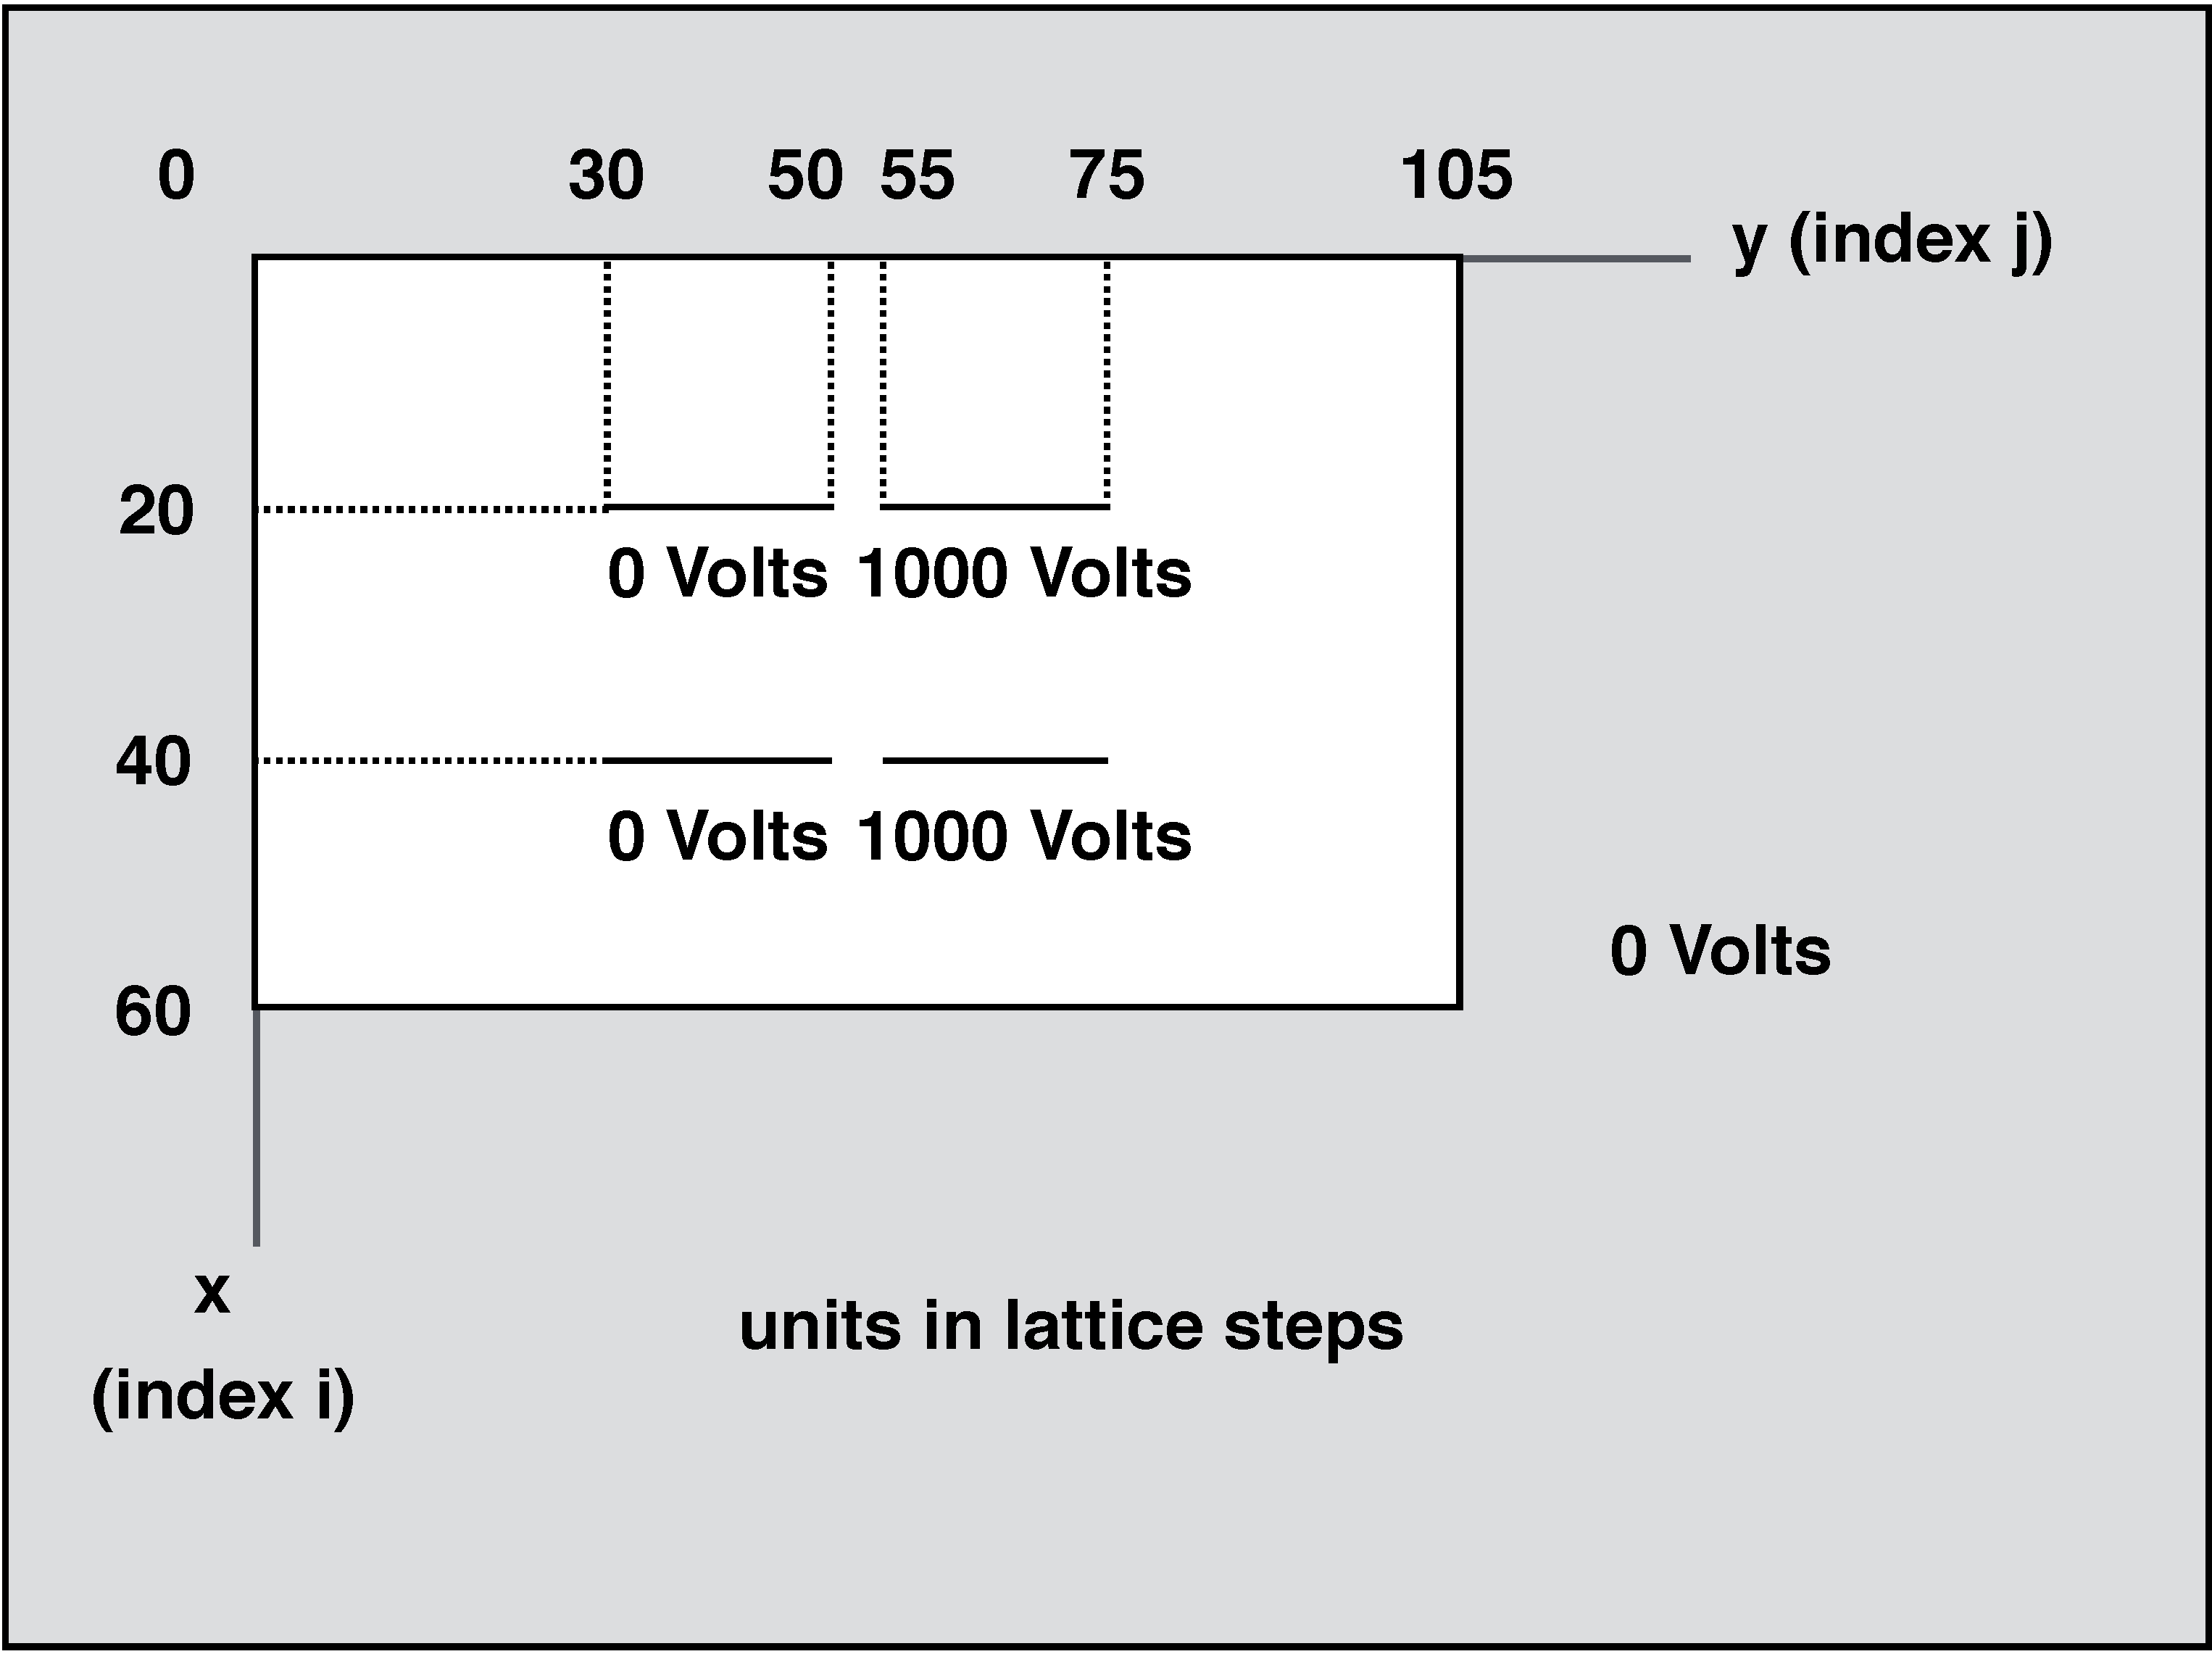

In [1]:
from IPython.display import Image
Image('Laplace_fig.png', width=500)

<h1><center> <span style='color:blue'>Optional Exercises:</span></center></h1>

<h2>H5 <span style='color:blue'>(optional)</span>: Divergence and Rotational of a vector field </h2>

Consider a continuously differentiable vector field in 3d-space: $\boldsymbol{F}(\boldsymbol{r})=\begin{pmatrix}F_x(\boldsymbol{r})\\F_y(\boldsymbol{r})\\F_z(\boldsymbol{r})\end{pmatrix}$

1. In 3-dimensional Cartesian coordinates, the divergence of $\boldsymbol{F}$ is defined as the scalar-valued function:
$${\rm div} \boldsymbol{F} = \frac{\partial F_x}{\partial x}+\frac{\partial F_y}{\partial y}+\frac{\partial F_z}{\partial z} $$<br>
Can you define a function that takes as argument a vector field (represented as a list of three functions of a real vector $r$), a position $\boldsymbol{r}$ (represented as an array of three real numbers), and a small step $h$, and that returns the value of the divergence in $\boldsymbol{r}$?<br><br>
Derivative can be calculated numerically using the approximate formula with small numerical step $h$:<br><br>
$$f^{\,\prime}(x)\simeq \frac{f(x+h)-f(x-h)}{2h}$$


2. In 3-dimensional Cartesian coordinates, the curl of $\boldsymbol{F}$ is defined as the vector:<br>
$$\boldsymbol{\nabla}\times\boldsymbol{F} = 
\begin{pmatrix}
    \frac{\partial F_z}{\partial y}-\frac{\partial F_y}{\partial z}\\
    \frac{\partial F_x}{\partial z}-\frac{\partial F_z}{\partial x}\\
    \frac{\partial F_y}{\partial x}-\frac{\partial F_x}{\partial y}
\end{pmatrix} $$<br>
Can you define a function that takes as argument a vector field (represented as a list of three functions of a real vector $r$), a position $\boldsymbol{r}$ (represented as an array of three real numbers), and a small step $h$, and that returns the value of the curl of $\boldsymbol{F}$ in $\boldsymbol{r}$?<br><br>